# 1.1 Deep vs Shallow - Simulate a function

In [1]:
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn

import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

import matplotlib.pyplot as plt
import math
import gc


Xshape: torch.Size([300, 1]) 
 Yshape: torch.Size([300, 1])


/local_scratch/slurm.712690/ipykernel_3317497/1073297461.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


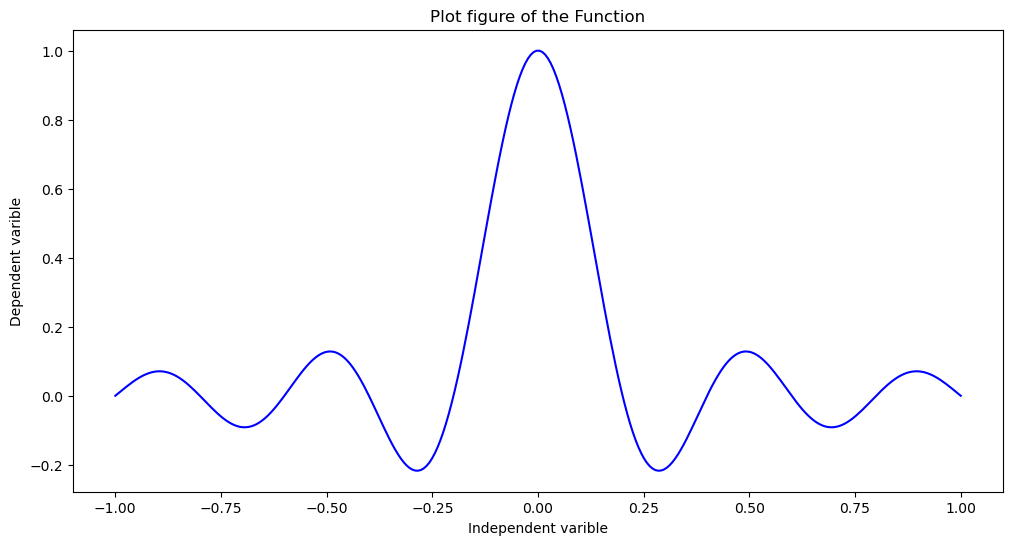

In [2]:
torch.manual_seed(1)
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)
y = (np.sin(5*np.pi*x))/(5*np.pi*x)

print('Xshape:',x.shape,"\n Yshape:",y.shape)

x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

plt.figure(figsize=(12,6))
plt.plot(x, y, color = "blue")
plt.title('Plot figure of the Function')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()
Nsample, n_features = x.shape

In [3]:
def train_function(model,x,y):
    model.train()
    max_epoch = 30000
    epoch_err,loss_err=[],[]
    not_con = True
    epoch = 0
    while not_con:
        epoch += 1
        prediction = model(x)     
        loss = loss_func(prediction, y)     
        optimizer.zero_grad()   
        loss.backward()         
        optimizer.step() 
        epoch_err.append(epoch)
        loss_err.append(loss.detach().numpy())
        
        if epoch%100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}', end='\r', flush= True) 
        if epoch == max_epoch:
                print("Maximum Epoch Reached")
                not_con = False
        elif (epoch > 5) and  (loss_err[-1] < 0.001):
            if abs(loss_err[-3] - loss_err[-2]) < 1.0e-05 and abs(loss_err[-2] - loss_err[-1]) < 1.0e-05:
                print(f"Convergeance reached for loss:{loss_err[-1]:.4f} at epoch: {epoch}")
                not_con = False
                
    return epoch_err,loss_err,prediction

In [4]:
def count_param(m,i):
  a=[]
  for i in m.parameters():
    a.append(torch.numel(i))
  print('Total number of parameters in Model :'+str(i), np.sum(a),)
def model_weight(m,flag,i):
   if flag:
    print("\nModel "+str(i)+" Weight & Bias BEFORE Training\n")
   else:print("\nModel "+str(i)+" Weight & Bias AFTER Training\n")
   for param in m.state_dict():
      print(param, "\t",m.state_dict()[param])

In [5]:
class M1(torch.nn.Module):
    def __init__(self):
        super(M1, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 5)
        self.hidden2 = torch.nn.Linear(5, 10)
        self.hidden3 = torch.nn.Linear(10, 10)
        self.hidden4 = torch.nn.Linear(10, 10)
        self.hidden5 = torch.nn.Linear(10, 10)
        self.hidden6 = torch.nn.Linear(10, 10)
        self.hidden7 = torch.nn.Linear(10, 5)
        self.predict = torch.nn.Linear(5, 1)

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.hidden1(x))
        x = torch.nn.functional.leaky_relu(self.hidden2(x))
        x = torch.nn.functional.leaky_relu(self.hidden3(x))
        x = torch.nn.functional.leaky_relu(self.hidden4(x))
        x = torch.nn.functional.leaky_relu(self.hidden5(x))
        x = torch.nn.functional.leaky_relu(self.hidden6(x))
        x = torch.nn.functional.leaky_relu(self.hidden7(x))
        x = self.predict(x)
        return x

In [6]:
m1 = M1() 
optimizer = torch.optim.Adam(m1.parameters(), lr=0.0014, weight_decay=1e-4)
loss_func = torch.nn.MSELoss()

Total number of parameters in Model :Parameter containing:
tensor([0.3165], requires_grad=True) 571

Model 1 Weight & Bias BEFORE Training

hidden1.weight 	 tensor([[ 0.5153],
        [-0.4414],
        [-0.1939],
        [ 0.4694],
        [-0.9414]])
hidden1.bias 	 tensor([ 0.5997, -0.2057,  0.5087,  0.1390, -0.1224])
hidden2.weight 	 tensor([[ 0.1240,  0.0221,  0.1633, -0.1743, -0.0326],
        [-0.0403,  0.0648, -0.0018,  0.3909,  0.1392],
        [-0.1665, -0.2701, -0.0750, -0.1929, -0.1433],
        [ 0.0214,  0.2666,  0.2431, -0.4372,  0.2772],
        [ 0.1249,  0.4242,  0.2952, -0.4075, -0.4252],
        [-0.2157,  0.3927, -0.0745,  0.1914, -0.2078],
        [ 0.4388, -0.1892,  0.3354,  0.0053, -0.2356],
        [ 0.2299, -0.2374,  0.1315, -0.1291, -0.0490],
        [-0.4299, -0.2132,  0.2427, -0.1087,  0.4454],
        [ 0.3585, -0.0209, -0.2985,  0.2723,  0.1388]])
hidden2.bias 	 tensor([-0.2891,  0.2905,  0.2715,  0.3966, -0.2507, -0.0736, -0.0087,  0.0653,
        -0.3394

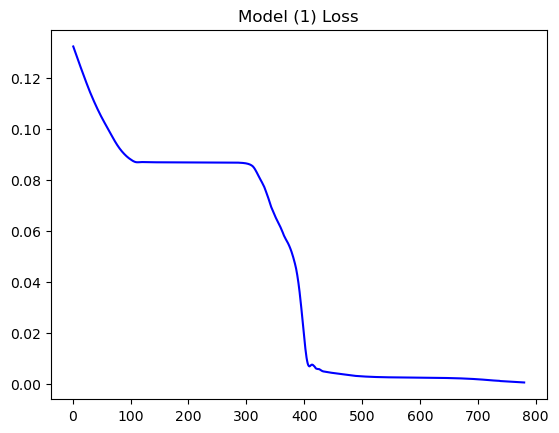

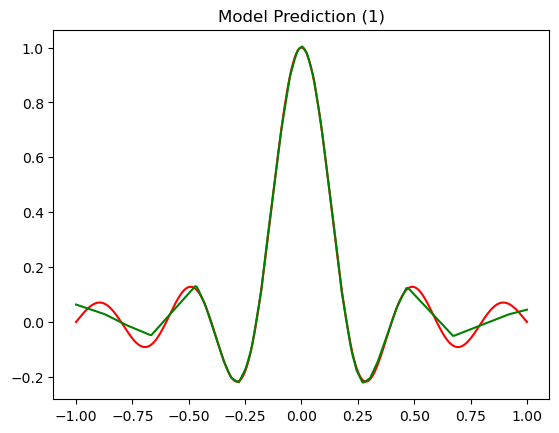

In [7]:
count_param(m1,1)
model_weight(m1,1,1)
M1_epoch_err,M1_loss_err,M1_predict = train_function(m1,x,y)
model_weight(m1,0,1)
plt.plot(M1_epoch_err,M1_loss_err,color="blue")
plt.title('Model (1) Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="red")
plt.plot(x,M1_predict.data.numpy(),color="green")
plt.title('Model Prediction (1)')
plt.show()

In [8]:
class M2(torch.nn.Module):
    def __init__(self,):
        super(M2, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 10)   
        self.hidden2 = torch.nn.Linear (10, 18)
        self.hidden3 = torch.nn.Linear (18, 15)
        self.hidden4 = torch.nn.Linear (15, 4)
        self.predict = torch.nn.Linear(4, 1)   
        
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      
        x = F.leaky_relu(self.hidden2(x))
        x = F.leaky_relu(self.hidden3(x))
        x = F.leaky_relu(self.hidden4(x))
        x = self.predict(x)                    
        return x

In [9]:
m2 = M2()    
optimizer = torch.optim.Adam(m2.parameters(), lr=0.0014, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()

Total number of parameters in Model :Parameter containing:
tensor([0.4854], requires_grad=True) 572

Model 3 Weight & Bias BEFORE Training

hidden1.weight 	 tensor([[-0.1516],
        [-0.8101],
        [-0.7396],
        [-0.2935],
        [-0.2215],
        [ 0.1141],
        [-0.2243],
        [ 0.3690],
        [-0.3326],
        [ 0.7340]])
hidden1.bias 	 tensor([ 0.2297, -0.3074,  0.8912,  0.2553, -0.6796, -0.5565,  0.6270,  0.4567,
         0.7808, -0.0768])
hidden2.weight 	 tensor([[ 0.2212,  0.1572,  0.0978, -0.0732,  0.3048,  0.0640, -0.0816, -0.0045,
          0.3109,  0.2124],
        [-0.0234,  0.3100,  0.1389, -0.1684, -0.2878,  0.1838,  0.2966, -0.1842,
          0.1299,  0.0135],
        [-0.0676, -0.0860,  0.0880,  0.0697,  0.2136,  0.1158,  0.1439,  0.2790,
          0.0985,  0.0469],
        [-0.1151,  0.2319,  0.0467,  0.2038,  0.3054, -0.0707,  0.2227, -0.0642,
          0.2854,  0.2489],
        [-0.1133,  0.0113, -0.1381, -0.1279, -0.0640, -0.0022, -0.1102, -0.29

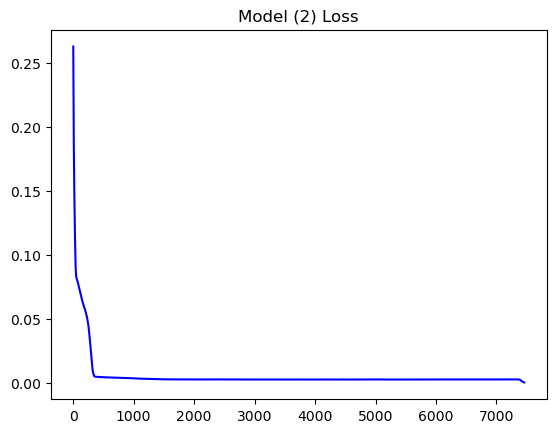

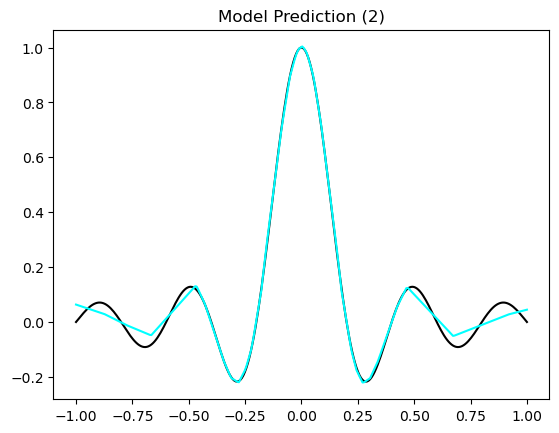

In [10]:
count_param(m2,3)
model_weight(m2,1,3)
M2_epoch_err,M2_loss_err,M2_predict = train_function(m2,x,y)
model_weight(m2,0,3)

plt.plot(M2_epoch_err,M2_loss_err,color="blue")
plt.title('Model (2) Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,M1_predict.data.numpy(),color="cyan")
plt.title('Model Prediction (2)')
plt.show()

In [11]:
class M3(torch.nn.Module):
    def __init__(self,):
        super(M3, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 190)   
        self.predict = torch.nn.Linear(190, 1)   
        
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      
        x = self.predict(x)                    
        return x

m3 = M3()    
optimizer = torch.optim.Adam(m3.parameters(), lr=0.0014, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 

Total number of parameters in Model :Parameter containing:
tensor([0.0330], requires_grad=True) 571

Model 3 Weight & Bias BEFORE Training

hidden1.weight 	 tensor([[-0.0454],
        [ 0.1646],
        [-0.2346],
        [-0.6331],
        [-0.4523],
        [-0.0664],
        [-0.8181],
        [-0.8082],
        [ 0.1097],
        [-0.6507],
        [-0.5439],
        [-0.0086],
        [-0.5270],
        [ 0.9256],
        [-0.3610],
        [-0.5560],
        [-0.2664],
        [-0.8159],
        [ 0.5152],
        [ 0.8592],
        [-0.5767],
        [-0.3717],
        [ 0.9333],
        [-0.7234],
        [ 0.2708],
        [-0.8148],
        [-0.8900],
        [ 0.0015],
        [-0.5707],
        [ 0.5416],
        [-0.3093],
        [ 0.0099],
        [-0.5221],
        [ 0.4109],
        [ 0.9265],
        [-0.1503],
        [-0.6172],
        [-0.9753],
        [ 0.9583],
        [ 0.4215],
        [ 0.4130],
        [ 0.1703],
        [ 0.5018],
        [ 0.3551],
       

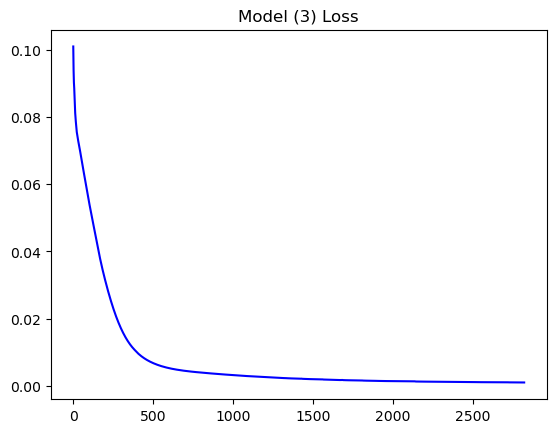

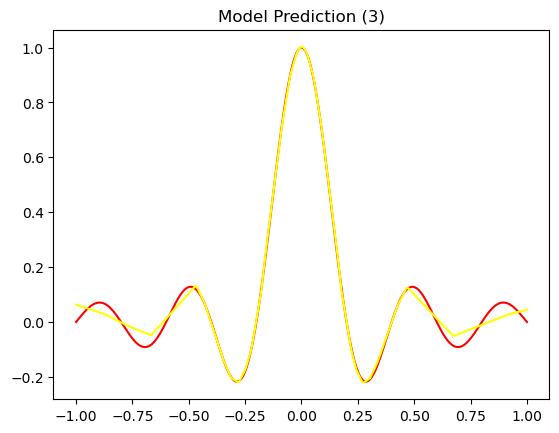

In [12]:
count_param(m3,1)
model_weight(m3,1,3)
M3_epoch_err,M3_loss_err,M3_predict = train_function(m3,x,y)
model_weight(m3,0,3)

plt.plot(M3_epoch_err,M3_loss_err,color="blue")
plt.title('Model (3) Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="red")
plt.plot(x,M1_predict.data.numpy(),color="yellow")
plt.title('Model Prediction (3)')
plt.show()

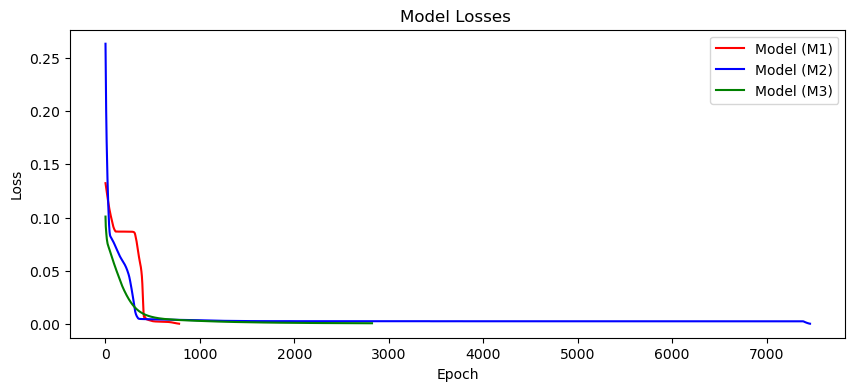

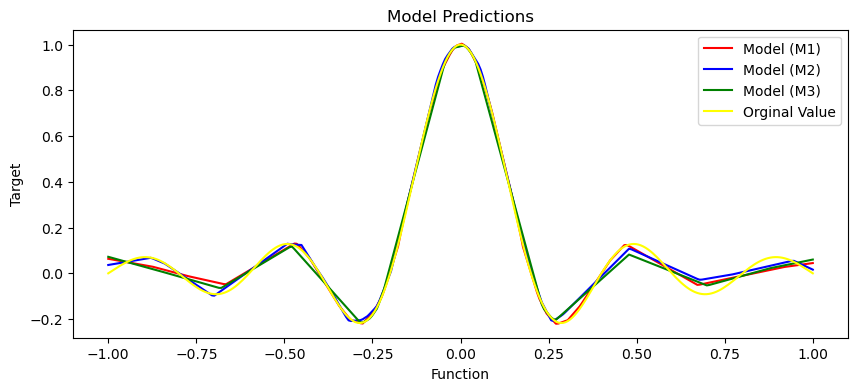

In [13]:
plt.figure(figsize=(10,4))
plt.plot(M1_epoch_err,M1_loss_err, color = "red")
plt.plot(M2_epoch_err,M2_loss_err, color = "blue")
plt.plot(M3_epoch_err,M3_loss_err, color = "green")
plt.title('Model Losses ')
plt.legend(['Model (M1)', 'Model (M2)','Model (M3)','Orginal Value'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(x,M1_predict.data.numpy(),color="red")
plt.plot(x,M2_predict.data.numpy(),color="blue")
plt.plot(x,M3_predict.data.numpy(),color="green")
plt.plot(x,y.numpy(),color="yellow")
plt.title('Model Predictions')
plt.legend(['Model (M1)', 'Model (M2)','Model (M3)','Orginal Value'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.show()

In [14]:
# Second Function


/local_scratch/slurm.712690/ipykernel_3317497/2961159398.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


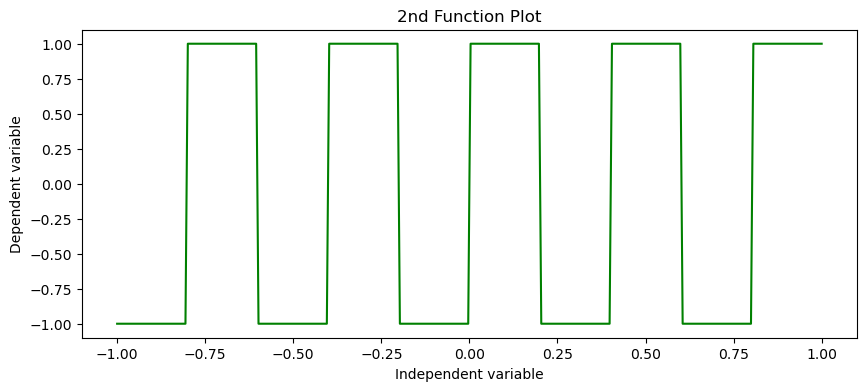

In [15]:
import torch
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(1)
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)
y = np.sign(np.sin(5 * np.pi * x))
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

plt.figure(figsize=(10,4))
plt.plot(x, y, color='green')
plt.title('2nd Function Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

Nsample, n_features = x.shape

Total number of parameters in Model :Parameter containing:
tensor([0.3165], requires_grad=True) 571

Model 1 Weight & Bias BEFORE Training

hidden1.weight 	 tensor([[ 0.5153],
        [-0.4414],
        [-0.1939],
        [ 0.4694],
        [-0.9414]])
hidden1.bias 	 tensor([ 0.5997, -0.2057,  0.5087,  0.1390, -0.1224])
hidden2.weight 	 tensor([[ 0.1240,  0.0221,  0.1633, -0.1743, -0.0326],
        [-0.0403,  0.0648, -0.0018,  0.3909,  0.1392],
        [-0.1665, -0.2701, -0.0750, -0.1929, -0.1433],
        [ 0.0214,  0.2666,  0.2431, -0.4372,  0.2772],
        [ 0.1249,  0.4242,  0.2952, -0.4075, -0.4252],
        [-0.2157,  0.3927, -0.0745,  0.1914, -0.2078],
        [ 0.4388, -0.1892,  0.3354,  0.0053, -0.2356],
        [ 0.2299, -0.2374,  0.1315, -0.1291, -0.0490],
        [-0.4299, -0.2132,  0.2427, -0.1087,  0.4454],
        [ 0.3585, -0.0209, -0.2985,  0.2723,  0.1388]])
hidden2.bias 	 tensor([-0.2891,  0.2905,  0.2715,  0.3966, -0.2507, -0.0736, -0.0087,  0.0653,
        -0.3394

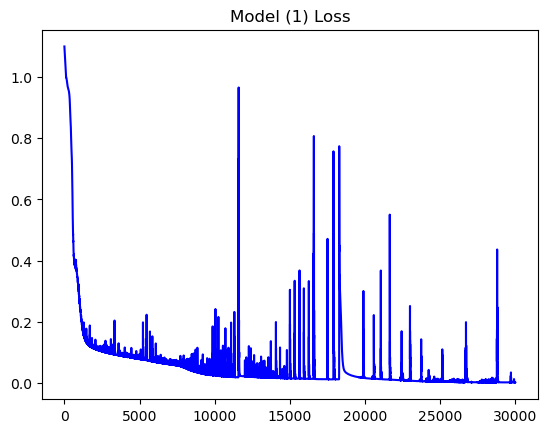

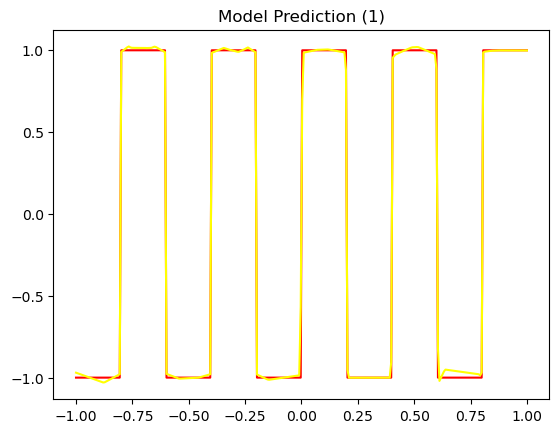

In [16]:
m1 = M1() 
optimizer = torch.optim.Adam(m1.parameters(), lr=0.0012, weight_decay=1e-4)
loss_func = torch.nn.MSELoss()
count_param(m1,1)
model_weight(m1,1,1)
M1_epoch_err,M1_loss_err,M1_predict = train_function(m1,x,y)
model_weight(m1,0,1)
plt.plot(M1_epoch_err,M1_loss_err,color="blue")
plt.title('Model (1) Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="red")
plt.plot(x,M1_predict.data.numpy(),color="yellow")
plt.title('Model Prediction (1)')
plt.show()

Total number of parameters in Model :Parameter containing:
tensor([0.4854], requires_grad=True) 572

Model 3 Weight & Bias BEFORE Training

hidden1.weight 	 tensor([[-0.1516],
        [-0.8101],
        [-0.7396],
        [-0.2935],
        [-0.2215],
        [ 0.1141],
        [-0.2243],
        [ 0.3690],
        [-0.3326],
        [ 0.7340]])
hidden1.bias 	 tensor([ 0.2297, -0.3074,  0.8912,  0.2553, -0.6796, -0.5565,  0.6270,  0.4567,
         0.7808, -0.0768])
hidden2.weight 	 tensor([[ 0.2212,  0.1572,  0.0978, -0.0732,  0.3048,  0.0640, -0.0816, -0.0045,
          0.3109,  0.2124],
        [-0.0234,  0.3100,  0.1389, -0.1684, -0.2878,  0.1838,  0.2966, -0.1842,
          0.1299,  0.0135],
        [-0.0676, -0.0860,  0.0880,  0.0697,  0.2136,  0.1158,  0.1439,  0.2790,
          0.0985,  0.0469],
        [-0.1151,  0.2319,  0.0467,  0.2038,  0.3054, -0.0707,  0.2227, -0.0642,
          0.2854,  0.2489],
        [-0.1133,  0.0113, -0.1381, -0.1279, -0.0640, -0.0022, -0.1102, -0.29

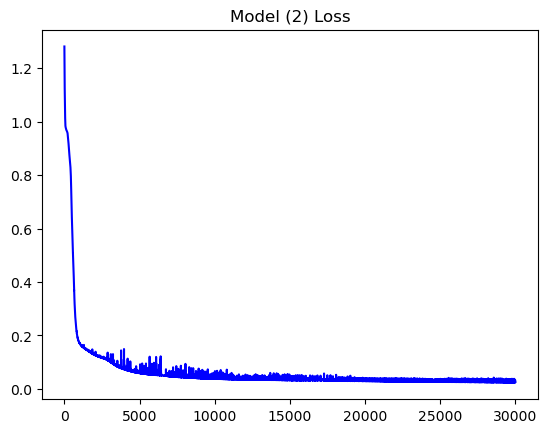

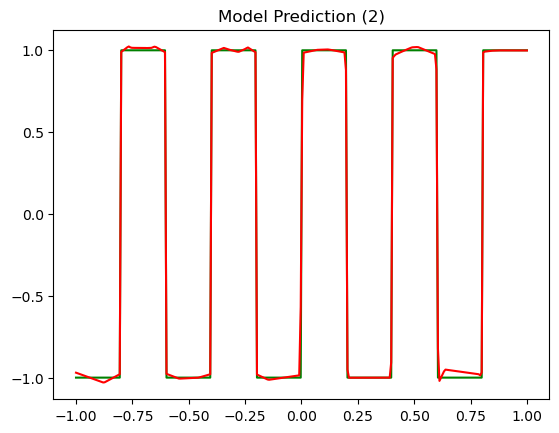

In [17]:
m2 = M2()    
optimizer = torch.optim.Adam(m2.parameters(), lr=0.0012, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
count_param(m2,3)
model_weight(m2,1,3)
M2_epoch_err,M2_loss_err,M2_predict = train_function(m2,x,y)
model_weight(m2,0,3)

plt.plot(M2_epoch_err,M2_loss_err,color="blue")
plt.title('Model (2) Loss')
plt.show()

plt.plot(x.numpy(),y.numpy(),color="green")
plt.plot(x,M1_predict.data.numpy(),color="red")
plt.title('Model Prediction (2)')
plt.show()

Total number of parameters in Model :Parameter containing:
tensor([0.0330], requires_grad=True) 571

Model 3 Weight & Bias BEFORE Training

hidden1.weight 	 tensor([[-0.0454],
        [ 0.1646],
        [-0.2346],
        [-0.6331],
        [-0.4523],
        [-0.0664],
        [-0.8181],
        [-0.8082],
        [ 0.1097],
        [-0.6507],
        [-0.5439],
        [-0.0086],
        [-0.5270],
        [ 0.9256],
        [-0.3610],
        [-0.5560],
        [-0.2664],
        [-0.8159],
        [ 0.5152],
        [ 0.8592],
        [-0.5767],
        [-0.3717],
        [ 0.9333],
        [-0.7234],
        [ 0.2708],
        [-0.8148],
        [-0.8900],
        [ 0.0015],
        [-0.5707],
        [ 0.5416],
        [-0.3093],
        [ 0.0099],
        [-0.5221],
        [ 0.4109],
        [ 0.9265],
        [-0.1503],
        [-0.6172],
        [-0.9753],
        [ 0.9583],
        [ 0.4215],
        [ 0.4130],
        [ 0.1703],
        [ 0.5018],
        [ 0.3551],
       

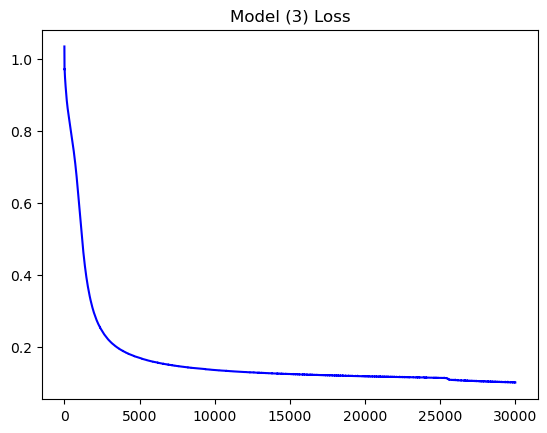

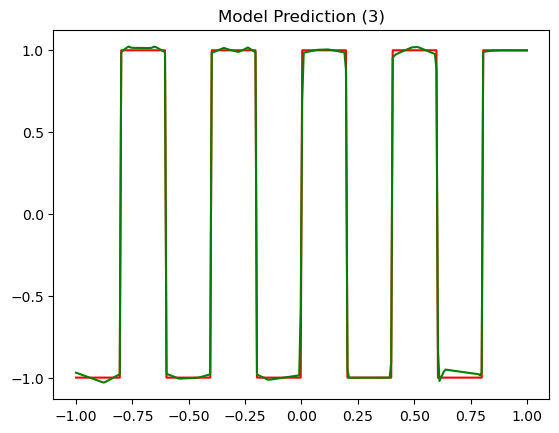

In [18]:
m3 = M3()     
optimizer = torch.optim.Adam(m3.parameters(), lr=0.0012, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 
count_param(m3,1)
model_weight(m3,1,3)
M3_epoch_err,M3_loss_err,M3_predict = train_function(m3,x,y)
model_weight(m3,0,3)

plt.plot(M3_epoch_err,M3_loss_err,color="blue")
plt.title('Model (3) Loss')
plt.show()

plt.plot(x.numpy(),y.numpy(),color="red")
plt.plot(x,M1_predict.data.numpy(),color="green")
plt.title('Model Prediction (3)')
plt.show()

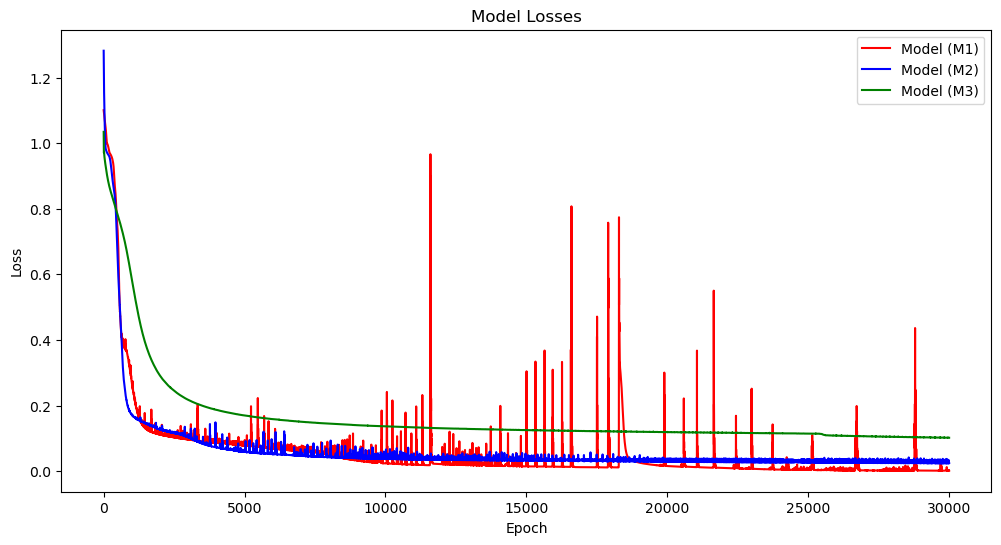

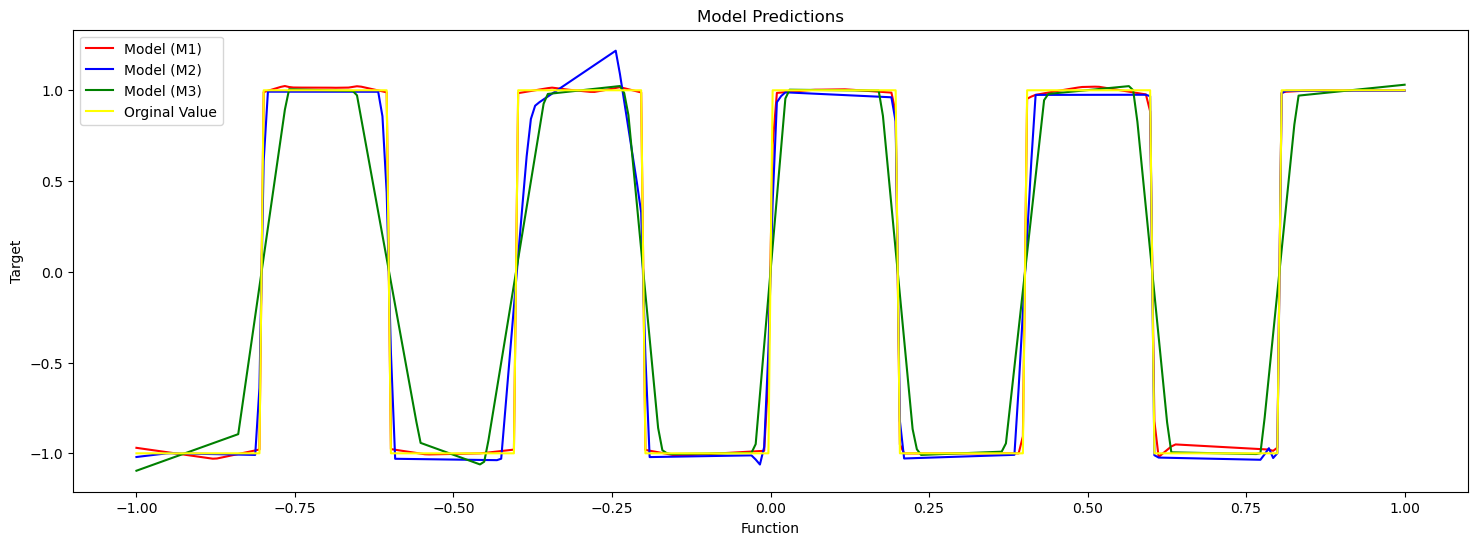

In [19]:
plt.figure(figsize=(12,6))
plt.plot(M1_epoch_err,M1_loss_err, color = "red")
plt.plot(M2_epoch_err,M2_loss_err, color = "blue")
plt.plot(M3_epoch_err,M3_loss_err, color = "green")
plt.title('Model Losses')
plt.legend(['Model (M1)', 'Model (M2)','Model (M3)','Orginal Value'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(18,6))
plt.plot(x,M1_predict.data.numpy(),color="red")
plt.plot(x,M2_predict.data.numpy(),color="blue")
plt.plot(x,M3_predict.data.numpy(),color="green")
plt.plot(x,y.numpy(),color="yellow")
plt.title('Model Predictions')
plt.legend(['Model (M1)', 'Model (M2)','Model (M3)','Orginal Value'],loc='best')
plt.xlabel('Function')
plt.ylabel('Target')
plt.show()

# MNIST_data - Train on actual task using shallow and deep models.

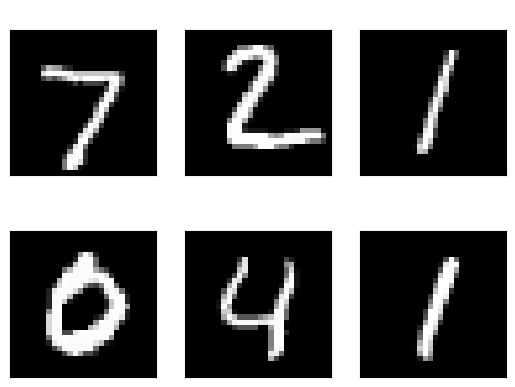

In [20]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
torch.manual_seed(1)

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=600, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

test_iter = iter(test_loader)
example_data, example_targets = next(test_iter)
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title("Actual Value: {}".format(example_targets[i]),color='white')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [21]:
def trainfunction(model,num_epochs):
    model.train()
    totalsteps = len(train_loader)
    training_loss = []
    training_epoch = []
    training_accuracy = []
    nconverged =True
    epoch = 0
    training_avg_loss_err = []
    while nconverged:
        epoch += 1
        Ncorrect = 0
        Nsample = 0
        loss_sum = 0

        for i, (images, labels) in enumerate(train_loader):  
            prediction = model(images)
            loss = loss_func(prediction, labels)
            loss_sum += loss.detach().numpy()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(prediction.data, 1)
            Nsample += labels.size(0)
            Ncorrect += (predicted == labels).sum().item()
            acc = 100.0 * Ncorrect / Nsample

            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch}/{num_epochs}], Step [{i+1}/{totalsteps}], Loss: {loss.item():.4f}',end='\r',flush=True)
                training_epoch.append(epoch)
                training_loss.append(loss.item())
                print(f'Epoch [{epoch}/{num_epochs}], Accuracy : {acc} %',end='\r',flush=True)
                training_accuracy.append(acc)

                if epoch == num_epochs:
                        print(f"Max Epoch Reached, Loss: {loss.item():.4f}, Accuracy:{acc:2f}%")
                        nconverged = False
                elif (epoch > 5) and  (training_loss[-1] < 0.001):
                    if abs(training_loss[-3] - training_loss[-2]) < 1.0e-05 and abs(training_loss[-2] - training_loss[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",training_loss[-1])
                        nconverged = False

        training_avg_loss_err.append(loss_sum/i+1)
        
                        
    return training_epoch,training_loss,training_accuracy,training_avg_loss_err

In [22]:
input_size = 784 
max_epoch = 15
learn_rate = 0.003
ksize = 4
weight = 1e-4
dropout = 0.25
class CNN1(nn.Module):
    def __init__(self,):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, ksize) 
        self.pool = nn.MaxPool2d(2, 2)    
        self.conv2 = nn.Conv2d(10, 20, ksize) 
        self.fc1 = nn.Linear(320, 50) 
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(50, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)            
        x = F.relu(self.fc1(x))          
        x = self.dropout(x)   
        x = F.relu(self.fc2(x))                 
        x = self.fc3(x)                      
        return x

Total number of parameters in Model (M1): 25550
Max Epoch Reached, Loss: 0.0657, Accuracy:98.623333%


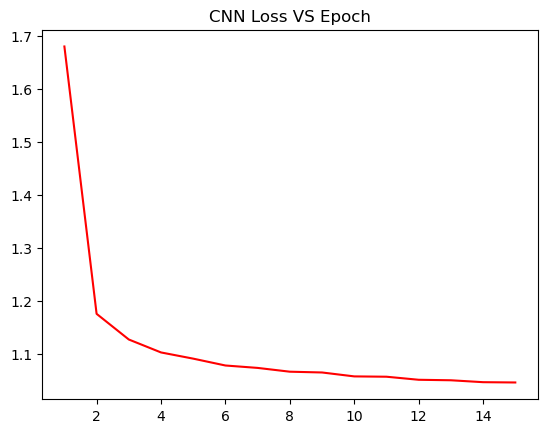

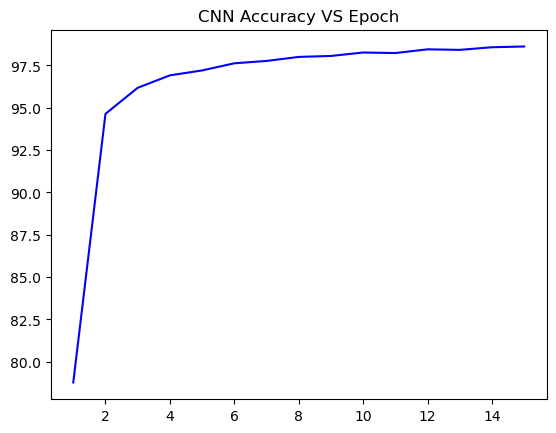

In [23]:
torch.manual_seed(1)

cnn1 = CNN1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn1.parameters(), lr=learn_rate, weight_decay = weight)
a=[]
for i in cnn1.parameters():
    a.append(torch.numel(i))
print('Total number of parameters in Model (M1):', np.sum(a),)
training_epoch,training_loss,training_accuracy,training_avg_loss_err =trainfunction(cnn1,max_epoch)
plt.plot(training_epoch,training_avg_loss_err,color="red")
plt.title('CNN Loss VS Epoch')
plt.show()
plt.plot(training_epoch,training_accuracy,color="blue")
plt.title('CNN Accuracy VS Epoch')
plt.show()

In [24]:
def testFunc (model):
    model.eval()
    with torch.no_grad():
        Ncorrect = 0
        Nsample = 0
        n_class_correct = [0 for i in range(10)]
        n_class_samples = [0 for i in range(10)]
        for test_images, test_labels in test_loader:
            outputs = model(test_images)
            _, predicted = torch.max(outputs, 1)
            Nsample += test_labels.size(0)
            Ncorrect += (predicted == test_labels).sum().item()
            
            for i in range(100):
                label = test_labels[i]
                pred = predicted[i]
                if (label == pred):
                    n_class_correct[label] += 1
                n_class_samples[label] += 1

        netTest_acc1 = 100.0 * Ncorrect / Nsample
        print(f'Accuracy of the network: {netTest_acc1} %')

        for i in range(10):
            acc = 100.0 * n_class_correct[i] / n_class_samples[i]
            print(f'Accuracy of {i}: {acc} %')
    
    return netTest_acc1
cnn1TestAcc = testFunc(cnn1)

Accuracy of the network: 99.04 %
Accuracy of 0: 99.18367346938776 %
Accuracy of 1: 99.47136563876651 %
Accuracy of 2: 99.4186046511628 %
Accuracy of 3: 99.10891089108911 %
Accuracy of 4: 99.08350305498982 %
Accuracy of 5: 98.54260089686099 %
Accuracy of 6: 99.26931106471817 %
Accuracy of 7: 98.83268482490273 %
Accuracy of 8: 98.97330595482546 %
Accuracy of 9: 98.41427155599604 %


Total number of parameters in Model (M2): 25570
Max Epoch Reached, Loss: 0.0467, Accuracy:98.930000%


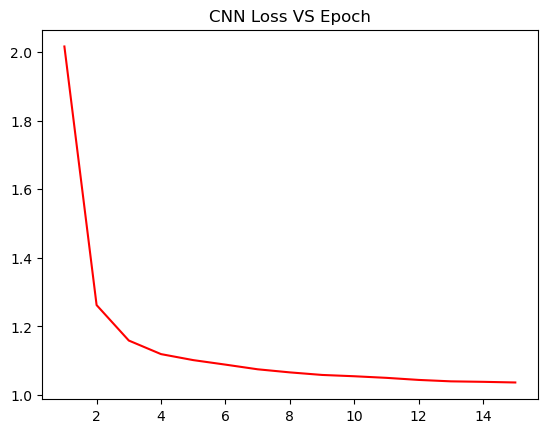

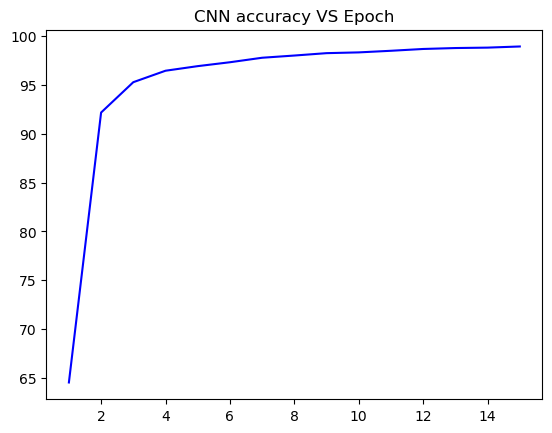

Accuracy of the network: 98.69 %
Accuracy of 0: 99.28571428571429 %
Accuracy of 1: 99.03083700440529 %
Accuracy of 2: 97.18992248062015 %
Accuracy of 3: 98.81188118811882 %
Accuracy of 4: 98.77800407331975 %
Accuracy of 5: 99.32735426008969 %
Accuracy of 6: 98.8517745302714 %
Accuracy of 7: 99.41634241245136 %
Accuracy of 8: 98.04928131416838 %
Accuracy of 9: 98.21605550049554 %


In [25]:
class CNN2(nn.Module):
    def __init__(self,):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, ksize) 
        self.pool = nn.MaxPool2d(2, 2)    
        self.conv2 = nn.Conv2d(10, 20, ksize) 
        self.fc1 = nn.Linear(20*ksize*ksize, 50) 
        self.fc2 = nn.Linear(50,50)
        self.fc3 = nn.Linear(50,40)
        self.fc4 = nn.Linear(40,30)
        self.fc5 = nn.Linear(30, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 320)           
        x = F.relu(self.fc1(x))               
        x = F.relu(self.fc2(x))         
        x = F.relu(self.fc3(x))         
        x = F.relu(self.fc4(x))        
        x = self.fc5(x)                      
        return x
torch.manual_seed(1)

cnn2 = CNN2()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn2.parameters(), lr=learn_rate, weight_decay = weight)

a=[]

for i in cnn2.parameters():
    a.append(torch.numel(i))
print('Total number of parameters in Model (M2):', np.sum(a),)
training_epoch2,training_loss2,training_accuracy2,training_avg_loss_err2=trainfunction(cnn2,max_epoch)


plt.plot(training_epoch2,training_avg_loss_err2,color="red")
plt.title('CNN Loss VS Epoch')
plt.show()
plt.plot(training_epoch2,training_accuracy2,color="blue")
plt.title('CNN accuracy VS Epoch')
plt.show()
cnn2TestAcc = testFunc(cnn2)

Total number of parameters in Model (M3): 25621
Max Epoch Reached, Loss: 0.0146, Accuracy:99.453333%


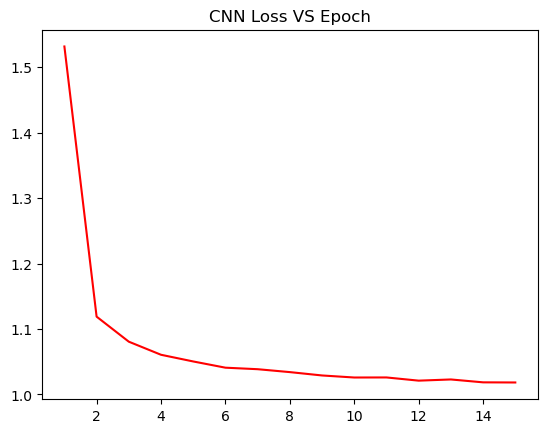

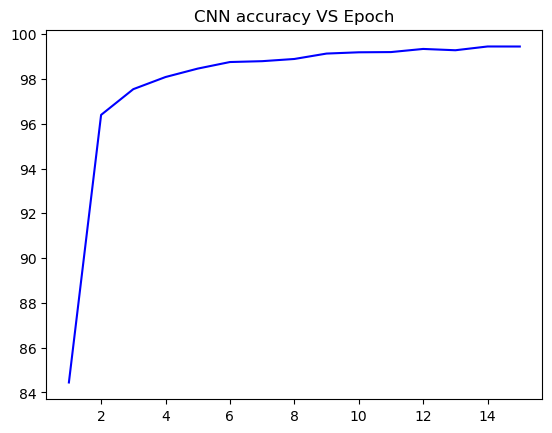

Accuracy of the network: 99.01 %
Accuracy of 0: 99.59183673469387 %
Accuracy of 1: 99.47136563876651 %
Accuracy of 2: 99.12790697674419 %
Accuracy of 3: 99.10891089108911 %
Accuracy of 4: 99.18533604887983 %
Accuracy of 5: 97.75784753363229 %
Accuracy of 6: 99.06054279749478 %
Accuracy of 7: 98.63813229571984 %
Accuracy of 8: 98.97330595482546 %
Accuracy of 9: 99.00891972249752 %


In [26]:
class CNN3(nn.Module):
    def __init__(self,): 
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 15, 5)
        self.fc1 = nn.Linear(15*4*4, 86)
        self.fc2 = nn.Linear(86, 10)
       

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
     
        x = x.view(-1, 15*4*4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x
torch.manual_seed(1)

cnn3 = CNN3()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn3.parameters(), lr=learn_rate, weight_decay = weight)

a=[]

for i in cnn3.parameters():
    a.append(torch.numel(i))
print('Total number of parameters in Model (M3):', np.sum(a))
training_epoch3,training_loss3,training_accuracy3,training_avg_loss_err3=trainfunction(cnn3,max_epoch)
plt.plot(training_epoch3,training_avg_loss_err3,color="red")
plt.title('CNN Loss VS Epoch')
plt.show()
plt.plot(training_epoch3,training_accuracy3,color="blue")
plt.title('CNN accuracy VS Epoch')
plt.show()
cnn3TestAcc = testFunc(cnn3)

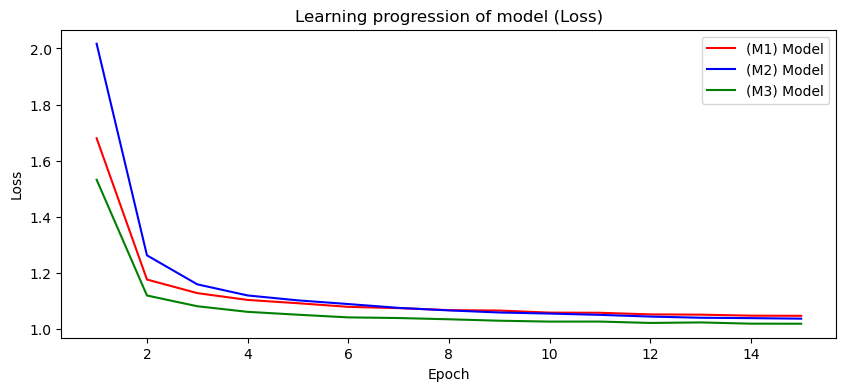

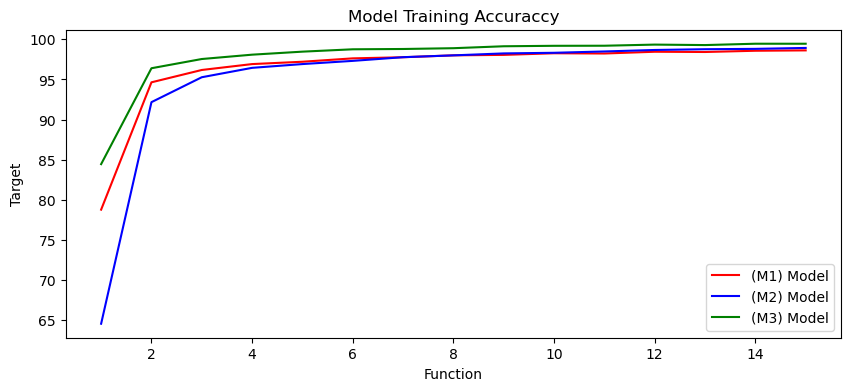

CNN1 Testing Accuracy: 99.04 % 
CNN2 Testing Accuracy: 98.69 % 
CNN3 Testing Accuracy: 99.01 %


In [27]:
plt.figure(figsize=(10,4))
plt.plot(training_epoch,training_avg_loss_err, color = "red")
plt.plot(training_epoch2,training_avg_loss_err2, color = "blue")
plt.plot(training_epoch3,training_avg_loss_err3, color = "green")
plt.title('Learning progression of model (Loss)')
plt.legend(['(M1) Model', '(M2) Model','(M3) Model','Orginal Value'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(training_epoch,training_accuracy,color="red")
plt.plot(training_epoch2,training_accuracy2,color="blue")
plt.plot(training_epoch3,training_accuracy3,color="green")
plt.title('Model Training Accuraccy')
plt.legend(['(M1) Model', '(M2) Model','(M3) Model','Orginal Value'])
plt.xlabel('Function')
plt.ylabel('Target')
plt.show()

print('CNN1 Testing Accuracy:',cnn1TestAcc,'%','\nCNN2 Testing Accuracy:',cnn2TestAcc,'%','\nCNN3 Testing Accuracy:',cnn3TestAcc,'%')